# Data import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv('./raw_data/tracks_features.csv')

In [5]:
data.columns

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'year', 'release_date'],
      dtype='object')

In [3]:
data_num = data.select_dtypes(exclude = ['object'])

# Basic Preproc Pipeline

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import faiss

I did't really give this too much thought, but I decided to just run a robust scaler on every numeric column to try out PCA and unsupervised NN hyperparameters

In [41]:
scaler = RobustScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_num), columns=data_num.columns)

In [9]:
data_scaled.shape

(1204025, 17)

In [10]:
faiss_scaled = faiss.Kmeans(data_scaled.shape[1], 10, niter=20, verbose=True)

In [42]:
pca = PCA()
pca.fit(data_scaled)

PCA()

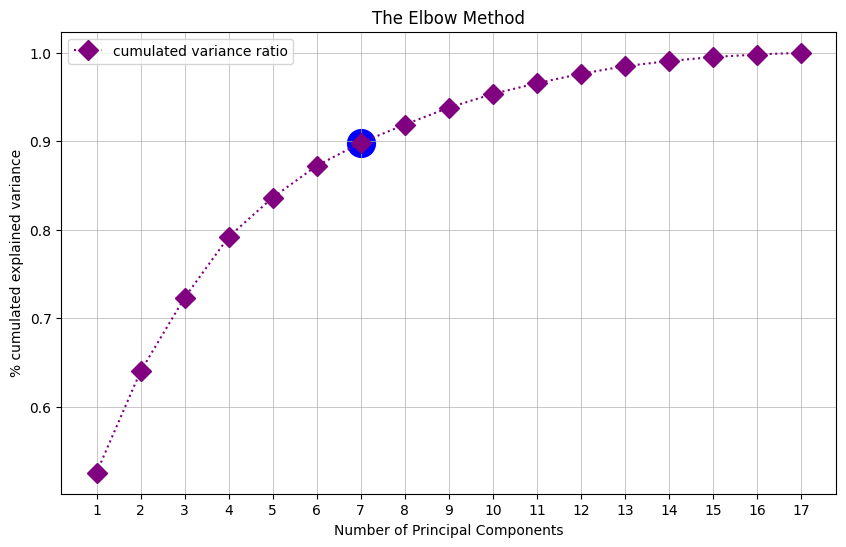

In [11]:
with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(10,6))
    # getting axes
    ax = plt.gca()
    # plotting
    explained_variance_ratio_cumulated = np.cumsum(pca.explained_variance_ratio_)
    x_axis_ticks = np.arange(1,explained_variance_ratio_cumulated.shape[0]+1)
    ax.plot(x_axis_ticks,explained_variance_ratio_cumulated,label="cumulated variance ratio",color="purple",linestyle=":",marker="D",markersize=10)
    # customizing
    ax.set_xlabel('Number of Principal Components')
    ax.set_ylabel('% cumulated explained variance')
    ax.legend(loc="upper left")
    ax.set_title('The Elbow Method')
    ax.set_xticks(x_axis_ticks)
    ax.scatter(7,explained_variance_ratio_cumulated[7-1],c='blue',s=400)
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)
    plt.show()


The elbow method suggests that 7 components are sufficient.

In [51]:
data_pca = pd.DataFrame(pca.transform(data_scaled)).sample(10000, random_state=42)

In [52]:
data_pca = data_pca.to_numpy()

### How many clusters in the KMeans?

This ended up not making it to the final product, as we ended up not needing any clustering models, however, I learned a lot doing this! I used Meta's Faiss package, which was unbelievably fast (running on my GPU). I also used the silhouette method to assess how many clusters I should use in the Faiss KMeans

In [25]:
# Apply the elbow method to find the optimal number of clusters.
nb_clusters_to_try = np.arange(1,20+1,1)
wcss = []

for K in nb_clusters_to_try:
    print('working with ' + str(K) + ' clusters...', flush=True)
    kmeans = KMeans(n_clusters = K)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)
print("DONE !")

working with 1 clusters...


/home/afonsofroes/.pyenv/versions/3.10.6/envs/terrible_with_concerts/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


working with 2 clusters...


/home/afonsofroes/.pyenv/versions/3.10.6/envs/terrible_with_concerts/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


working with 3 clusters...


/home/afonsofroes/.pyenv/versions/3.10.6/envs/terrible_with_concerts/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


working with 4 clusters...


/home/afonsofroes/.pyenv/versions/3.10.6/envs/terrible_with_concerts/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


working with 5 clusters...


/home/afonsofroes/.pyenv/versions/3.10.6/envs/terrible_with_concerts/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


working with 6 clusters...


/home/afonsofroes/.pyenv/versions/3.10.6/envs/terrible_with_concerts/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


working with 7 clusters...


/home/afonsofroes/.pyenv/versions/3.10.6/envs/terrible_with_concerts/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


working with 8 clusters...


/home/afonsofroes/.pyenv/versions/3.10.6/envs/terrible_with_concerts/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


working with 9 clusters...


/home/afonsofroes/.pyenv/versions/3.10.6/envs/terrible_with_concerts/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


working with 10 clusters...


/home/afonsofroes/.pyenv/versions/3.10.6/envs/terrible_with_concerts/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


working with 11 clusters...


/home/afonsofroes/.pyenv/versions/3.10.6/envs/terrible_with_concerts/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


working with 12 clusters...


/home/afonsofroes/.pyenv/versions/3.10.6/envs/terrible_with_concerts/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


working with 13 clusters...


/home/afonsofroes/.pyenv/versions/3.10.6/envs/terrible_with_concerts/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


working with 14 clusters...


/home/afonsofroes/.pyenv/versions/3.10.6/envs/terrible_with_concerts/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


working with 15 clusters...


/home/afonsofroes/.pyenv/versions/3.10.6/envs/terrible_with_concerts/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


working with 16 clusters...


/home/afonsofroes/.pyenv/versions/3.10.6/envs/terrible_with_concerts/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


working with 17 clusters...


/home/afonsofroes/.pyenv/versions/3.10.6/envs/terrible_with_concerts/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


working with 18 clusters...


/home/afonsofroes/.pyenv/versions/3.10.6/envs/terrible_with_concerts/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


working with 19 clusters...


/home/afonsofroes/.pyenv/versions/3.10.6/envs/terrible_with_concerts/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


working with 20 clusters...


/home/afonsofroes/.pyenv/versions/3.10.6/envs/terrible_with_concerts/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


DONE !


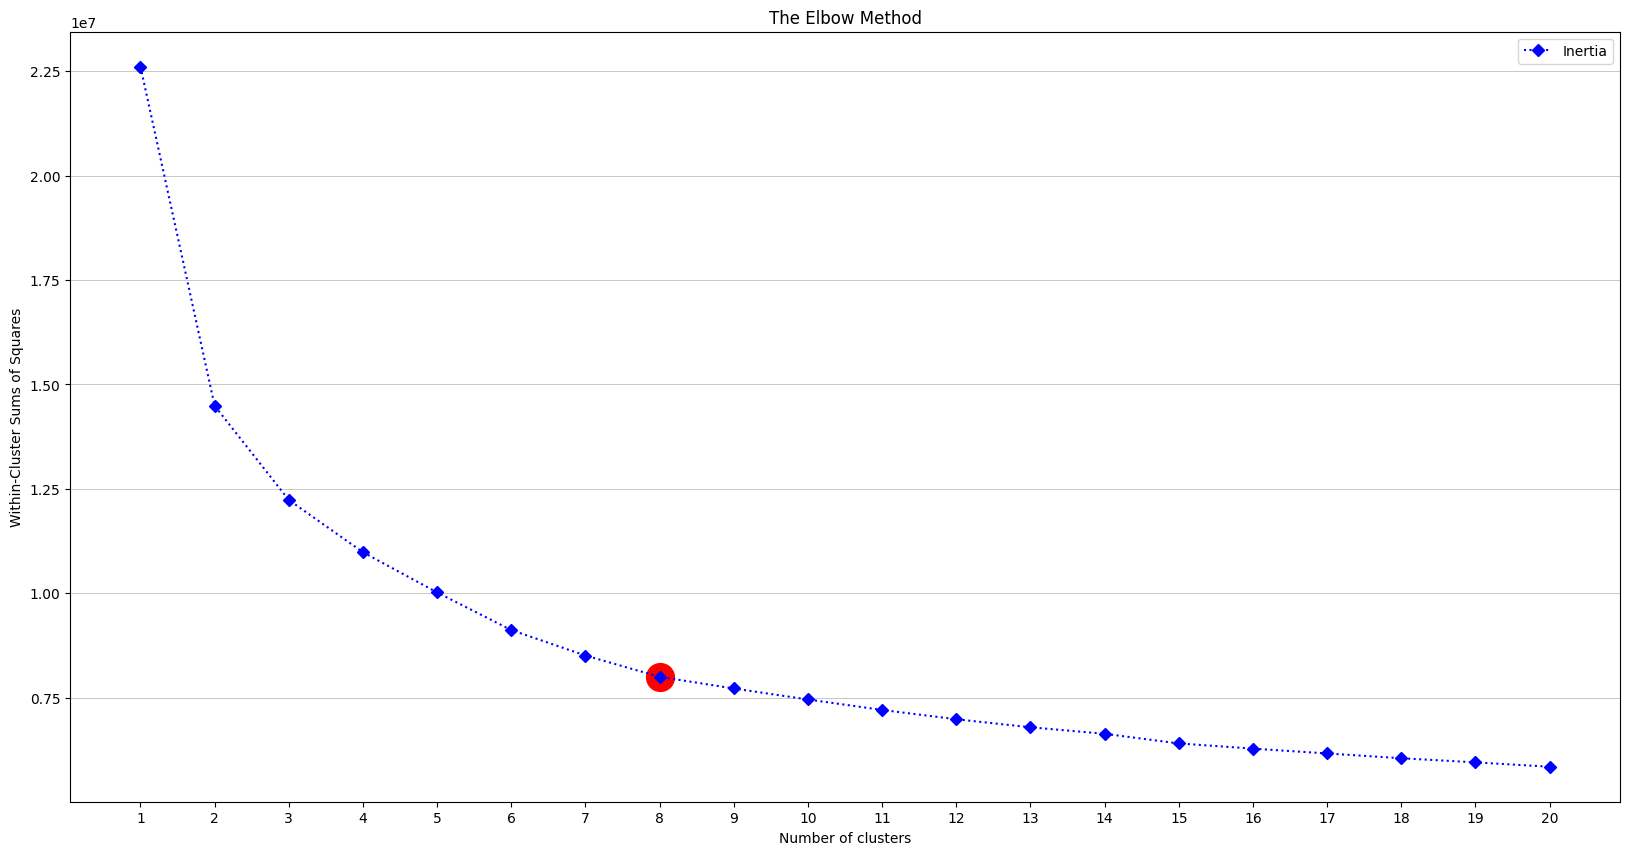

In [31]:
elbow_highlight = 8
with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(20,10))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(nb_clusters_to_try, wcss,color="blue",linestyle=":",marker="D",label="Inertia")
    # customizing
    ax.legend(loc="upper right")
    ax.set_title('The Elbow Method')
    ax.set_xticks(nb_clusters_to_try)
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Within-Cluster Sums of Squares')
    ax.scatter(elbow_highlight,wcss[elbow_highlight-1],c='red',s=400)    
    # annotate
    #ax.annotate("Elbow?", 
    #            (elbow_highlight,wcss[elbow_highlight-1]),
    #            (elbow_highlight+0.50,wcss[elbow_highlight-1]+5000), 
    #            arrowprops=dict(facecolor='black'),
    #            fontsize=16,
    #            horizontalalignment='middle', 
    #            verticalalignment='top')
    
    ax.grid(axis="y",linewidth=0.5)
    plt.show()

### Using Faiss Kmeans

In [53]:
sv_list = []
for k in range(2, 100):    
    k = k #num_clusters has been defined somewhere outside
    niter = 20 #number of iterations
    verbose = True #verbosity flag
    gpu = True #use GPU for processing

    # data to be clustered
    data = data_pca.astype('float32')

    # Initializing Kmeans object by calling faiss Kmeans function
    kmeans = faiss.Kmeans(d=data.shape[1], k=k, niter=niter, verbose=verbose, gpu=gpu)

    # Training on the input data
    kmeans.train(data)
    labels = kmeans.index.search(data, 1)[1].flatten()

    score = silhouette_score(data, labels)
    sv_list.append(score)
    #print(f"Silhouette score: {score}")

Sampling a subset of 512 / 10000 for training
Clustering 512 points in 17D to 2 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.00 s
  Iteration 19 (0.16 s, search 0.13 s): objective=6872.22 imbalance=1.732 nsplit=0       
Sampling a subset of 768 / 10000 for training
Clustering 768 points in 17D to 3 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.00 s
  Iteration 19 (0.15 s, search 0.14 s): objective=8425.63 imbalance=2.029 nsplit=0       
Sampling a subset of 1024 / 10000 for training
Clustering 1024 points in 17D to 4 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.00 s
  Iteration 19 (0.16 s, search 0.15 s): objective=10447.8 imbalance=1.620 nsplit=0       
Sampling a subset of 1280 / 10000 for training
Clustering 1280 points in 17D to 5 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.00 s
  Iteration 19 (0.33 s, search 0.14 s): objective=10748.2 imbalance=2.014 nsplit=0       
Sampling a subset of 1536 / 10000 for training
Clustering 15

0

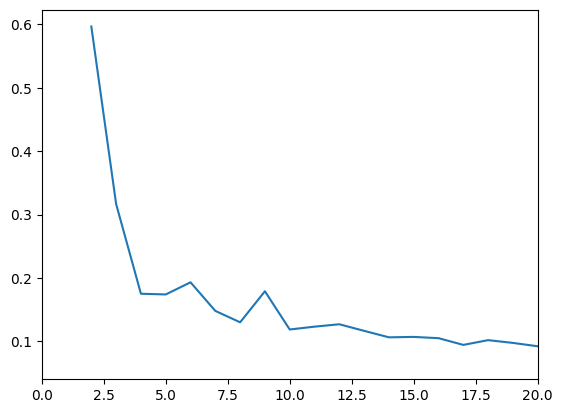

In [61]:
plt.plot(range(2, 100), sv_list)
plt.xlim(0,20)
sv_list.index(max(sv_list))

In [78]:
from sklearn.metrics import silhouette_score

# Assume data and labels are defined
# data: n x d array where n is the number of data points and d is the dimensionality
# labels: n-dimensional vector containing label assignments for each point

k = 5    # Number of clusters to use in k-means

# Initialize and train k-means model
index = faiss.IndexFlatL2(data_pca.shape[1])
kmeans = faiss.Kmeans(data_pca.shape[1], k)
kmeans.niter = 20
#kmeans.train(data_scaled, index)

# Get cluster centers and assign labels to data points
#labels = index.search(kmeans.centroids, k)
#labels = labels[1].reshape(-1)

# Calculate silhouette score
#score = silhouette_score(data, labels)

#print(f"Silhouette score: {score}")
kmeans


In [36]:
# Load dataset
d = 128
n = 1000
xb = faiss.randn((n, d)).astype('float32')

# Set number of clusters
k = 4

# Initialize k-means
index = faiss.IndexFlatL2(d)
kmeans = faiss.Kmeans(d, k, verbose=False, gpu=False)

# Train k-means
kmeans.train(xb)
D, I = index.search(xb, 1)

# Compute silhouette score


labels = kmeans.assign(xb)
score = silhouette_score(xb, labels[1])
print(score)


0.0063593034


In [ ]:
k = 4 #num_clusters has been defined somewhere outside
niter = 20 #number of iterations
verbose = True #verbosity flag
gpu = True #use GPU for processing

# data to be clustered
data = data_scaled.astype('float32')
data_scaled = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Initializing Kmeans object by calling faiss Kmeans function
kmeans = faiss.Kmeans(d=data_scaled.shape[1], k=k, niter=niter, verbose=verbose, gpu=gpu)

# Training on the input data
kmeans.train(data_scaled)


Sampling a subset of 1024 / 1204025 for training
Clustering 1024 points in 17D to 4 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.07 s
  Iteration 19 (1.09 s, search 0.07 s): objective=16161 imbalance=1.570 nsplit=0         


16160.982421875

In [ ]:
k = 4 #num_clusters has been defined somewhere outside
niter = 20 #number of iterations
verbose = True #verbosity flag
gpu = True #use GPU for processing

# data to be clustered
data = data_scaled.astype('float32')
data_scaled = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Initializing Kmeans object by calling faiss Kmeans function
kmeans = faiss.Kmeans(d=data_scaled.shape[1], k=k, niter=niter, verbose=verbose, gpu=gpu)

# Training on the input data
kmeans.train(data_scaled)


Sampling a subset of 1024 / 1204025 for training
Clustering 1024 points in 17D to 4 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.07 s
  Iteration 19 (1.09 s, search 0.07 s): objective=16161 imbalance=1.570 nsplit=0         


16160.982421875

In [ ]:
k = 4 #num_clusters has been defined somewhere outside
niter = 20 #number of iterations
verbose = True #verbosity flag
gpu = True #use GPU for processing

# data to be clustered
data = data_scaled.astype('float32')
data_scaled = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Initializing Kmeans object by calling faiss Kmeans function
kmeans = faiss.Kmeans(d=data_scaled.shape[1], k=k, niter=niter, verbose=verbose, gpu=gpu)

# Training on the input data
kmeans.train(data_scaled)


Sampling a subset of 1024 / 1204025 for training
Clustering 1024 points in 17D to 4 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.07 s
  Iteration 19 (1.09 s, search 0.07 s): objective=16161 imbalance=1.570 nsplit=0         


16160.982421875

In [ ]:
k = 4 #num_clusters has been defined somewhere outside
niter = 20 #number of iterations
verbose = True #verbosity flag
gpu = True #use GPU for processing

# data to be clustered
data = data_scaled.astype('float32')
data_scaled = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Initializing Kmeans object by calling faiss Kmeans function
kmeans = faiss.Kmeans(d=data_scaled.shape[1], k=k, niter=niter, verbose=verbose, gpu=gpu)

# Training on the input data
kmeans.train(data_scaled)


Sampling a subset of 1024 / 1204025 for training
Clustering 1024 points in 17D to 4 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.07 s
  Iteration 19 (1.09 s, search 0.07 s): objective=16161 imbalance=1.570 nsplit=0         


16160.982421875

In [ ]:
k = 4 #num_clusters has been defined somewhere outside
niter = 20 #number of iterations
verbose = True #verbosity flag
gpu = True #use GPU for processing

# data to be clustered
data = data_scaled.astype('float32')
data_scaled = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Initializing Kmeans object by calling faiss Kmeans function
kmeans = faiss.Kmeans(d=data_scaled.shape[1], k=k, niter=niter, verbose=verbose, gpu=gpu)

# Training on the input data
kmeans.train(data_scaled)


Sampling a subset of 1024 / 1204025 for training
Clustering 1024 points in 17D to 4 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.07 s
  Iteration 19 (1.09 s, search 0.07 s): objective=16161 imbalance=1.570 nsplit=0         


16160.982421875

In [ ]:
k = 4 #num_clusters has been defined somewhere outside
niter = 20 #number of iterations
verbose = True #verbosity flag
gpu = True #use GPU for processing

# data to be clustered
data = data_scaled.astype('float32')
data_scaled = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Initializing Kmeans object by calling faiss Kmeans function
kmeans = faiss.Kmeans(d=data_scaled.shape[1], k=k, niter=niter, verbose=verbose, gpu=gpu)

# Training on the input data
kmeans.train(data_scaled)


Sampling a subset of 1024 / 1204025 for training
Clustering 1024 points in 17D to 4 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.07 s
  Iteration 19 (1.09 s, search 0.07 s): objective=16161 imbalance=1.570 nsplit=0         


16160.982421875

In [ ]:
k = 4 #num_clusters has been defined somewhere outside
niter = 20 #number of iterations
verbose = True #verbosity flag
gpu = True #use GPU for processing

# data to be clustered
data = data_scaled.astype('float32')
data_scaled = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Initializing Kmeans object by calling faiss Kmeans function
kmeans = faiss.Kmeans(d=data_scaled.shape[1], k=k, niter=niter, verbose=verbose, gpu=gpu)

# Training on the input data
kmeans.train(data_scaled)


Sampling a subset of 1024 / 1204025 for training
Clustering 1024 points in 17D to 4 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.07 s
  Iteration 19 (1.09 s, search 0.07 s): objective=16161 imbalance=1.570 nsplit=0         


16160.982421875

In [ ]:
k = 4 #num_clusters has been defined somewhere outside
niter = 20 #number of iterations
verbose = True #verbosity flag
gpu = True #use GPU for processing

# data to be clustered
data = data_scaled.astype('float32')
data_scaled = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Initializing Kmeans object by calling faiss Kmeans function
kmeans = faiss.Kmeans(d=data_scaled.shape[1], k=k, niter=niter, verbose=verbose, gpu=gpu)

# Training on the input data
kmeans.train(data_scaled)


Sampling a subset of 1024 / 1204025 for training
Clustering 1024 points in 17D to 4 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.07 s
  Iteration 19 (1.09 s, search 0.07 s): objective=16161 imbalance=1.570 nsplit=0         


16160.982421875

In [28]:
from sklearn.metrics import silhouette_score

range_n_clusters = np.arange(6,10+1,1)
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 print(f"Running KMeans with {num_clusters} clusters")
 k = 6 #num_clusters has been defined somewhere outside
niter = 20 #number of iterations
verbose = True #verbosity flag
gpu = True #use GPU for processing

# data to be clustered
data = data_pca.astype('float32')
data_scaled = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Initializing Kmeans object by calling faiss Kmeans function
kmeans = faiss.Kmeans(d=data_scaled.shape[1], k=k, niter=niter, verbose=verbose, gpu=gpu)

# Training on the input data
kmeans.train(data_scaled)
 kmeans = faiss.Kmeans(data_scaled.shape[1], k=num_clusters, niter=20, verbose=True, gpu=True)
 kmeans.train(data_scaled)
 cluster_labels = kmeans.labels_
 
 
 # silhouette score
 silhouette_avg.append(silhouette_score(data_pca, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

Running KMeans with 6 clusters


TypeError: Wrong number or type of arguments for overloaded function 'new_Clustering'.
  Possible C/C++ prototypes are:
    faiss::Clustering::Clustering(int,int)
    faiss::Clustering::Clustering(int,int,faiss::ClusteringParameters const &)


In [19]:
preproc = make_pipeline(RobustScaler(), PCA(n_components=7), KMeans(n_clusters=8))

In [20]:
preproc.fit(data_num)

/home/afonsofroes/.pyenv/versions/3.10.6/envs/terrible_with_concerts/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('robustscaler', RobustScaler()), ('pca', PCA(n_components=7)),
                ('kmeans', KMeans())])